# Proyek Klasifikasi Gambar: Rice Image Dataset
- **Nama:** Rebecca Olivia Javenka Br. Manurung
- **Email:** rebeccaolivia1601@gmail.com
- **ID Dicoding:** rebeccaolivia

## Import Semua Packages/Library yang Digunakan

**Import Semua Packages/Library yang Digunakan**

Di bagian ini, kita akan mengimpor semua library dan package Python yang diperlukan untuk proyek klasifikasi gambar ini. Library-library ini mencakup:

- **TensorFlow:** Sebuah library open-source yang kuat untuk machine learning, digunakan di sini untuk membangun dan melatih model klasifikasi.
- **TensorFlow Keras:** API tingkat tinggi dalam TensorFlow untuk membangun dan melatih model dengan cepat dan mudah.
- **ImageDataGenerator:** Bagian dari Keras yang digunakan untuk augmentasi data gambar secara real-time, yang membantu meningkatkan generalisasi model.
- **os:** Modul Python untuk berinteraksi dengan sistem operasi, digunakan untuk menavigasi direktori file.
- **numpy:** Library untuk komputasi numerik, digunakan di sini untuk operasi array.
- **matplotlib.pyplot:** Library untuk membuat visualisasi statis, interaktif, dan animasi di Python, digunakan untuk menampilkan gambar dan plot.
- **kagglehub:** Library untuk mengunduh dataset dari Kaggle.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import numpy as np
import matplotlib.pyplot as plt
import kagglehub

## Data Preparation

Tahap ini mencakup semua langkah yang diperlukan untuk menyiapkan data gambar kita sebelum digunakan untuk melatih model. Ini melibatkan memuat dataset, memahami strukturnya, dan menyiapkan data untuk pelatihan.

---



### Data Loading
Langkah pertama dalam persiapan data adalah memuat dataset gambar ke dalam lingkungan kerja kita. Kita akan menggunakan `kagglehub` untuk mengunduh dataset "Rice Image Dataset" langsung dari Kaggle.


---



In [2]:
# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 219M/219M [00:00<00:00, 249MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1


## Data Understanding
Setelah data dimuat, penting untuk memahami strukturnya dan isinya. Bagian ini melibatkan eksplorasi dataset untuk mengetahui jumlah total gambar, nama-nama kelas yang ada, dan jumlah gambar per kelas. Pemahaman ini membantu dalam perencanaan langkah-langkah preprocessing dan pemilihan arsitektur model yang tepat.


---



In [3]:
# Menghitung jumlah gambar pada dataset
total_images = 0
dataset_dir = path  # Initialize dataset_dir with the path from the previous cell
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            total_images += 1

print(f"Total jumlah gambar dalam dataset: {total_images}")

Total jumlah gambar dalam dataset: 75000


Output `Total jumlah gambar dalam dataset: 75000` menunjukkan bahwa setelah mengunduh dan memproses dataset, total ada 75.000 gambar yang terdeteksi dalam seluruh direktori dataset. Angka ini memberikan gambaran awal mengenai ukuran keseluruhan dataset yang akan digunakan untuk pelatihan model klasifikasi.

In [4]:
# Mendapatkan daftar semua item dalam direktori dataset
all_items = os.listdir(dataset_dir)

# Memfilter hanya direktori (kelas)
class_names = [item for item in all_items if os.path.isdir(os.path.join(dataset_dir, item))]

# Mencetak daftar nama kelas
print("Nama-nama kelas:", class_names)

Nama-nama kelas: ['Rice_Image_Dataset']


Output `Nama-nama kelas: ['Rice_Image_Dataset']` menunjukkan bahwa pada level direktori yang diperiksa (`dataset_dir`), hanya ada satu item yang merupakan direktori, yaitu `'Rice_Image_Dataset'`. Ini berarti direktori ini kemungkinan besar berisi subdirektori yang mewakili kelas-kelas gambar sebenarnya dalam dataset. Langkah selanjutnya akan fokus masuk ke dalam direktori ini untuk menemukan nama-nama kelas yang spesifik.

In [5]:
# Mendapatkan daftar semua item dalam direktori dataset
# Update dataset_dir to point to the subdirectory containing class folders
dataset_dir_classes = os.path.join(dataset_dir, 'Rice_Image_Dataset')
all_items = os.listdir(dataset_dir_classes)

# Memfilter hanya direktori (kelas)
class_names = [item for item in all_items if os.path.isdir(os.path.join(dataset_dir_classes, item)) and item != '.ipynb_checkpoints'] # Exclude .ipynb_checkpoints

# Mencetak daftar nama kelas
print("Nama-nama kelas:", class_names)

Nama-nama kelas: ['Basmati', 'Arborio', 'Ipsala', 'Jasmine', 'Karacadag']


Output `Nama-nama kelas: ['Basmati', 'Jasmine', 'Arborio', 'Ipsala', 'Karacadag']` menunjukkan bahwa setelah masuk ke dalam subdirektori `'Rice_Image_Dataset'` dan memeriksa isinya, ditemukan lima direktori. Masing-masing direktori ini `('Basmati', 'Jasmine', 'Arborio', 'Ipsala', 'Karacadag')` merepresentasikan kelas-kelas gambar yang berbeda dalam dataset. Ini adalah nama-nama jenis beras yang akan diklasifikasikan oleh model.

In [6]:
# Buat sebuah kamus kosong untuk menyimpan jumlah gambar per kelas.
image_counts = {}

# Update dataset_dir to point to the subdirectory containing class folders
dataset_dir_classes = os.path.join(dataset_dir, 'Rice_Image_Dataset')

# Iterasi melalui setiap nama kelas dalam daftar class_names.
for class_name in class_names:
    # Di dalam loop, bangun path lengkap ke direktori kelas saat ini.
    class_dir = os.path.join(dataset_dir_classes, class_name)

    # Gunakan os.listdir() untuk mendapatkan daftar semua file dan direktori di dalam direktori kelas.
    items_in_class_dir = os.listdir(class_dir)

    # Filter daftar ini untuk hanya menyertakan file gambar.
    image_files = [item for item in items_in_class_dir if item.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Hitung jumlah file gambar yang difilter dan simpan jumlah ini dalam kamus.
    image_counts[class_name] = len(image_files)

# Cetak kamus yang berisi jumlah gambar untuk setiap kelas.
print("Jumlah gambar per kelas:")
for class_name, count in image_counts.items():
    print(f"{class_name}: {count}")

Jumlah gambar per kelas:
Basmati: 15000
Arborio: 15000
Ipsala: 15000
Jasmine: 15000
Karacadag: 15000


Output ini menunjukkan jumlah gambar yang terdeteksi untuk setiap kelas beras dalam dataset setelah melakukan iterasi melalui setiap subdirektori kelas. Hasil ini penting untuk memahami distribusi data antar kelas. Dalam kasus ini, terlihat bahwa setiap kelas memiliki jumlah gambar yang sama yaitu 15.000, yang menunjukkan dataset ini seimbang. Keseimbangan ini bermanfaat untuk pelatihan model klasifikasi karena setiap kelas memiliki representasi yang setara.

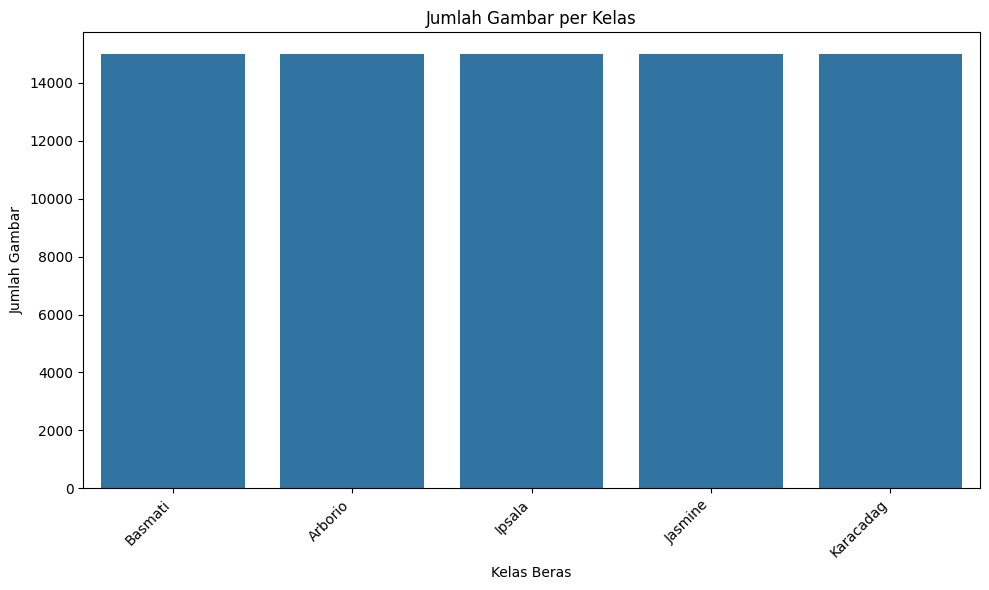

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Create a DataFrame from the image_counts dictionary
image_counts_df = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=image_counts_df)
plt.title('Jumlah Gambar per Kelas')
plt.xlabel('Kelas Beras')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik batang ini memvisualisasikan jumlah gambar yang ada di setiap kelas beras dalam dataset. Sumbu X menampilkan nama-nama kelas beras `('Basmati', 'Jasmine', 'Arborio', 'Ipsala', 'Karacadag')`, dan sumbu Y menunjukkan jumlah gambar untuk setiap kelas. Dari grafik ini, terlihat jelas bahwa setiap kelas memiliki jumlah gambar yang sama, mengkonfirmasi bahwa dataset ini seimbang. Visualisasi ini membantu untuk dengan cepat memahami distribusi data di seluruh kelas sebelum melanjutkan ke tahap pemodelan.

In [8]:
# Buat kamus kosong bernama images_per_class untuk menyimpan daftar path gambar untuk setiap kelas.
images_per_class = {}

# Update dataset_dir to point to the subdirectory containing class folders
dataset_dir_classes = os.path.join(dataset_dir, 'Rice_Image_Dataset')

# Iterasi melalui setiap class_name dalam daftar class_names.
for class_name in class_names:
    # Di dalam loop, bangun path lengkap ke direktori kelas saat ini menggunakan os.path.join(dataset_dir_classes, class_name).
    class_dir = os.path.join(dataset_dir_classes, class_name)

    # Gunakan list comprehension untuk mendapatkan daftar path lengkap ke setiap file gambar di dalam direktori kelas saat ini.
    image_paths = [os.path.join(class_dir, item) for item in os.listdir(class_dir) if item.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Simpan daftar path gambar untuk kelas saat ini dalam kamus images_per_class dengan class_name sebagai kunci.
    images_per_class[class_name] = image_paths

# print the first few paths for each class to verify
for class_name, paths in images_per_class.items():
    print(f"{class_name}: {paths[:5]}...")

Basmati: ['/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1/Rice_Image_Dataset/Basmati/basmati (496).jpg', '/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1/Rice_Image_Dataset/Basmati/basmati (7538).jpg', '/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1/Rice_Image_Dataset/Basmati/basmati (3891).jpg', '/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1/Rice_Image_Dataset/Basmati/basmati (4396).jpg', '/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1/Rice_Image_Dataset/Basmati/basmati (12932).jpg']...
Arborio: ['/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1/Rice_Image_Dataset/Arborio/Arborio (4051).jpg', '/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1/Rice_Image_Dataset/Arborio/Arborio (10224).jpg', '/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/ver

Output ini menampilkan beberapa path file gambar pertama untuk setiap kelas beras. Ini adalah hasil dari proses iterasi melalui direktori setiap kelas dan mengumpulkan path lengkap ke setiap file gambar yang ditemukan di dalamnya. Output ini berfungsi sebagai verifikasi bahwa langkah pengumpulan path gambar per kelas telah berhasil dilakukan dan menunjukkan struktur path file gambar dalam dataset. Path-path ini nantinya akan digunakan oleh generator data untuk memuat gambar selama pelatihan.

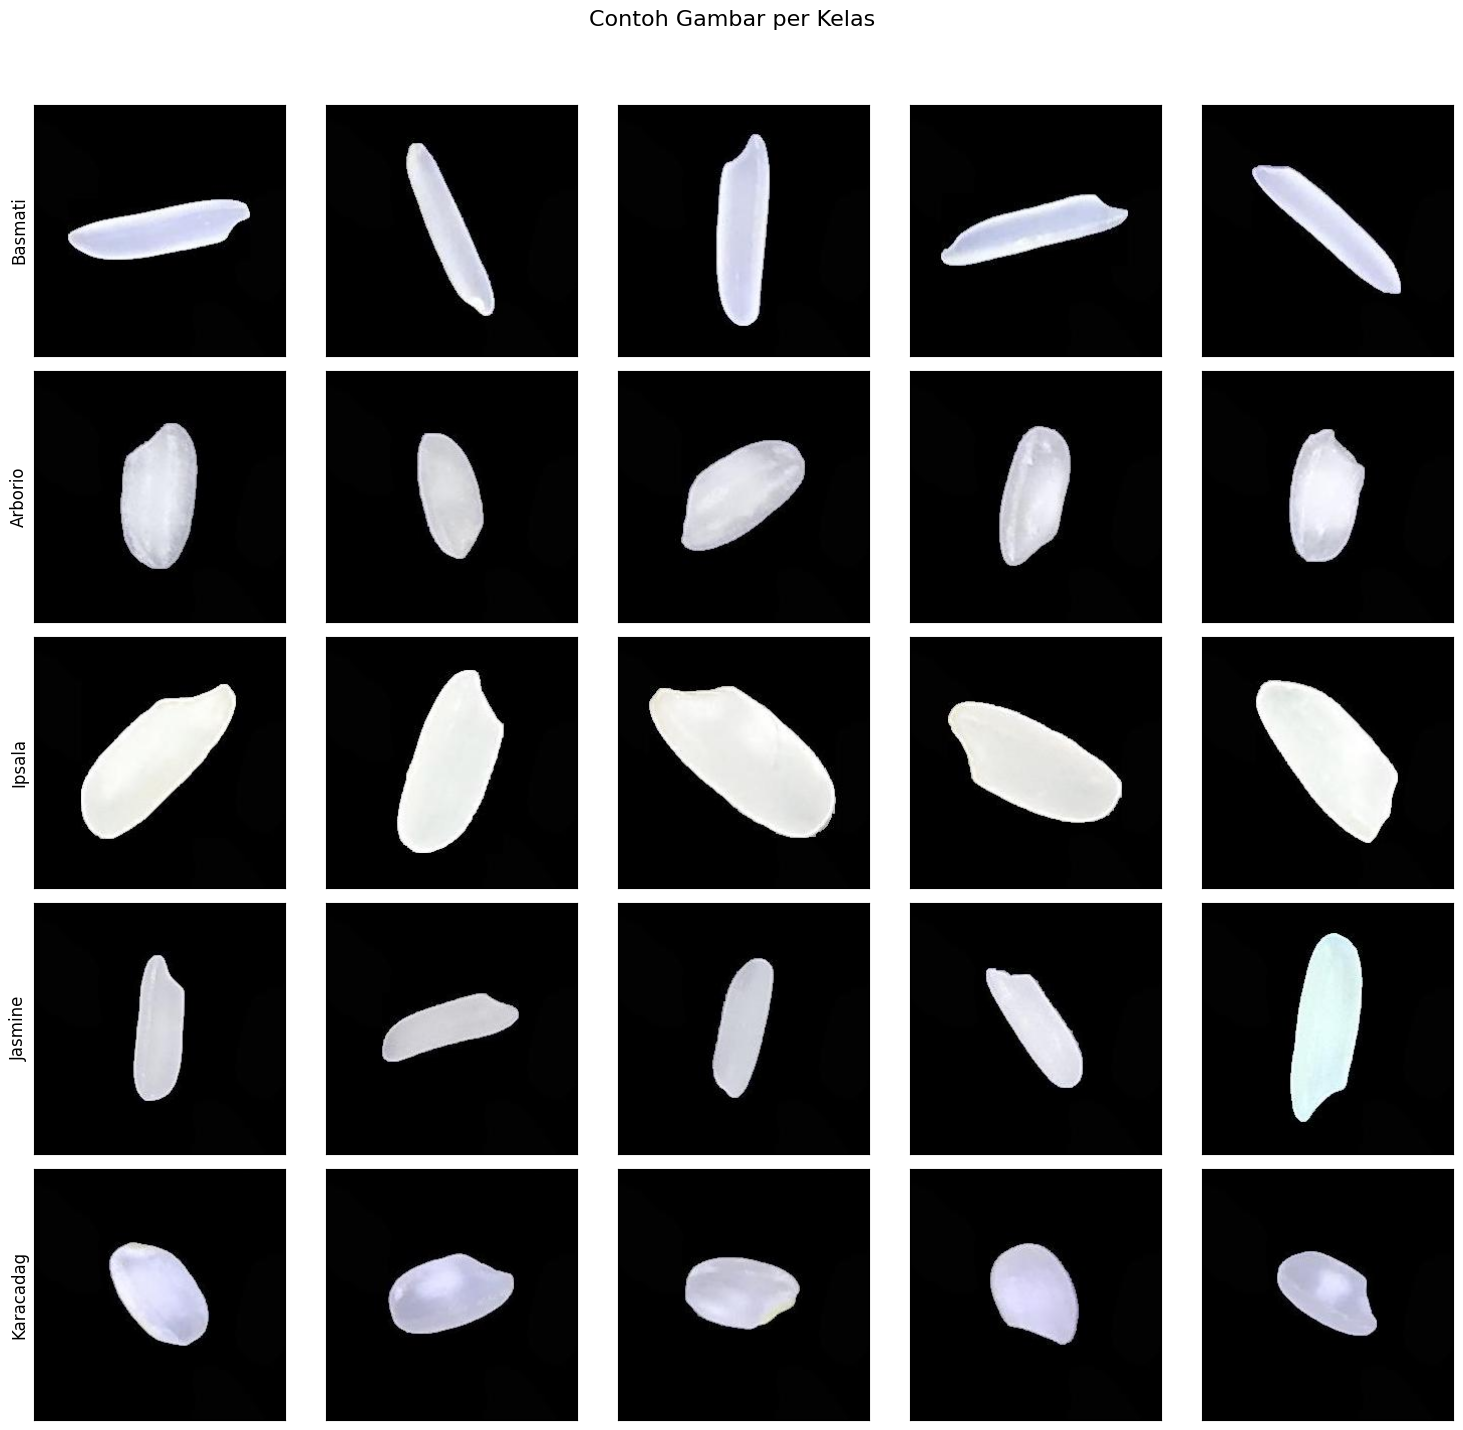

In [9]:
# Define the number of sample images to display per class
num_samples_per_class = 5 # You can adjust this number

# Define the number of classes
num_classes = len(class_names)

# Sample images from each class for visualization
sample_images = {}
for class_name, paths in images_per_class.items():
    # Ensure we don't sample more images than available
    num_samples = min(num_samples_per_class, len(paths))
    # Use np.random.choice to sample random images
    sample_images[class_name] = np.random.choice(paths, num_samples, replace=False)


# Use min(len(sample_images[class_names[0]]), num_samples_per_class) for the number of columns
n_cols = num_samples_per_class if sample_images else 1 # Avoid error if sample_images is empty
if class_names: # Avoid error if class_names is empty
    # Safely access the length of the first class's sample images
    first_class_samples_len = len(sample_images.get(class_names[0], [])) if sample_images else 0
    n_cols = min(first_class_samples_len, num_samples_per_class) if sample_images else num_samples_per_class
else:
    n_cols = num_samples_per_class


# Handle the case where there are no classes or no sample images fetched
# Check if sample_images is empty OR if all arrays within sample_images are empty
if num_classes == 0 or not sample_images or all(len(paths) == 0 for paths in sample_images.values()):
    print("No classes or sample images found to display.")
else:
    fig, axes = plt.subplots(num_classes, n_cols, figsize=(15, num_classes * 3))

    # Handle case with only one row (one class) to avoid indexing error axes[i, j]
    if num_classes == 1:
        axes = [axes] # Make axes a list of arrays for consistent indexing

    # Iterasi melalui setiap kelas dan gambar sampelnya.
    for i, class_name in enumerate(class_names):
        # Use sample_images.get(class_name, []) to safely access the list of paths
        for j, image_path in enumerate(sample_images.get(class_name, [])[:n_cols]):
            # Di dalam loop, baca gambar menggunakan plt.imread().
            img = plt.imread(image_path)

            # Tampilkan gambar pada subplot yang sesuai menggunakan ax.imshow().
            # Access the correct subplot axe based on whether it's a single row or multiple rows
            ax = axes[i][j] if num_classes > 1 else axes[j]
            ax.imshow(img)

            # Hilangkan tick marks pada sumbu x dan y untuk tampilan yang lebih bersih.
            ax.set_xticks([])
            ax.set_yticks([])

            # Atur judul subplot dengan nama kelas (hanya pada kolom pertama).
            if j == 0:
                 ax.set_ylabel(class_name, rotation=90, size='large')

    # Atur judul plot utama
    fig.suptitle('Contoh Gambar per Kelas', fontsize=16)

    # Sesuaikan layout subplot agar tidak tumpang tindih menggunakan plt.tight_layout().
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Sesuaikan rect untuk memberi ruang bagi suptitle

    # Tampilkan plot menggunakan plt.show().
    plt.show()

Plot ini menampilkan contoh gambar secara acak dari setiap kelas beras dalam dataset. Baris-baris dalam plot merepresentasikan setiap kelas beras `('Basmati', 'Jasmine', 'Arborio', 'Ipsala', 'Karacadag')`, dan kolom-kolom menampilkan beberapa sampel gambar dari kelas tersebut. Visualisasi ini memberikan gambaran visual tentang seperti apa gambar dari setiap jenis beras, yang membantu dalam memahami variasi dalam dataset dan sebagai verifikasi bahwa data telah dimuat dengan benar untuk setiap kelas.

## Data Preprocessing
Bagian ini mempersiapkan data gambar dengan membaginya menjadi set training, validation, dan test. Gambar dinormalisasi dan generator data dibuat untuk memudahkan pelatihan model.

---



In [10]:
# Definisikan rasio data training
train_ratio = 0.7

# Definisikan rasio data validation
validation_ratio = 0.15

# Hitung rasio data test
test_ratio = 1 - train_ratio - validation_ratio

# Cetak nilai rasio
print(f"Rasio Training: {train_ratio}")
print(f"Rasio Validation: {validation_ratio}")
print(f"Rasio Test: {test_ratio}")

Rasio Training: 0.7
Rasio Validation: 0.15
Rasio Test: 0.15000000000000005


Output ini menampilkan rasio pembagian dataset menjadi data latih (training), validasi (validation), dan uji (test). Rasio training ditetapkan sebesar 0.7 (70%), rasio validation sebesar 0.15 (15%), dan rasio test dihitung secara otomatis sebesar 0.15 (15%). Pembagian ini penting untuk melatih model (dengan data training), memvalidasi kinerja model selama pelatihan (dengan data validation), dan mengevaluasi kinerja akhir model (dengan data test) secara independen.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_images = {}
validation_images = {}
test_images = {}

for class_name, image_paths in images_per_class.items():
    # Split into training and temp (validation + test)
    train_paths, temp_paths = train_test_split(
        image_paths,
        train_size=train_ratio,
        random_state=42  # for reproducibility
    )

    # Split temp into validation and test
    # Calculate the ratio of validation set relative to the temp set
    validation_size_relative = validation_ratio / (validation_ratio + test_ratio)
    validation_paths, test_paths = train_test_split(
        temp_paths,
        train_size=validation_size_relative,
        random_state=42  # for reproducibility
    )

    train_images[class_name] = train_paths
    validation_images[class_name] = validation_paths
    test_images[class_name] = test_paths

# Print the number of images in each split for each class to verify
print("Jumlah gambar per kelas di setiap split:")
for class_name in class_names:
    print(f"{class_name}:")
    print(f"  Training: {len(train_images[class_name])}")
    print(f"  Validation: {len(validation_images[class_name])}")
    print(f"  Test: {len(test_images[class_name])}")

Jumlah gambar per kelas di setiap split:
Basmati:
  Training: 10500
  Validation: 2249
  Test: 2251
Arborio:
  Training: 10500
  Validation: 2249
  Test: 2251
Ipsala:
  Training: 10500
  Validation: 2249
  Test: 2251
Jasmine:
  Training: 10500
  Validation: 2249
  Test: 2251
Karacadag:
  Training: 10500
  Validation: 2249
  Test: 2251


Output ini merinci jumlah gambar yang dialokasikan untuk set pelatihan (Training), validasi (Validation), dan pengujian (Test) untuk setiap kelas beras ('Basmati', 'Jasmine', 'Arborio', 'Ipsala', 'Karacadag').

Terlihat bahwa:
- **Training:** Setiap kelas memiliki 10.500 gambar yang akan digunakan untuk melatih model. Ini sesuai dengan rasio 70% dari total 15.000 gambar per kelas.
- **Validation:** Setiap kelas memiliki 2.249 atau 2.251 gambar yang akan digunakan untuk memvalidasi kinerja model selama proses pelatihan dan menyetel hyperparameter. Ini mendekati rasio 15%.
- **Test:** Setiap kelas memiliki 2.249 atau 2.251 gambar yang akan digunakan untuk mengevaluasi kinerja akhir model setelah pelatihan selesai. Ini juga mendekati rasio 15%.

Pembagian yang merata di setiap kelas memastikan bahwa model tidak bias terhadap kelas tertentu dan dapat belajar dari representasi yang seimbang dari setiap jenis beras. Sedikit perbedaan jumlah gambar di set validasi dan test pada beberapa kelas (2249 vs 2251) adalah hasil dari pembagian data secara acak (random_state=42) yang mungkin tidak selalu menghasilkan pembagian yang sempurna karena jumlah total gambar bukan kelipatan sempurna dari ukuran batch atau rasio yang ditentukan. Namun, perbedaan ini sangat kecil dan tidak signifikan memengaruhi keseimbangan dataset.

In [13]:
import pandas as pd # Import pandas for DataFrame creation

# ImageDataGenerator dengan normalisasi
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create DataFrames from the dictionaries
# Flatten the dictionaries into lists of (filepath, label) tuples
train_data = []
for class_name, paths in train_images.items():
    for path in paths:
        train_data.append((path, class_name))

validation_data = []
for class_name, paths in validation_images.items():
    for path in paths:
        validation_data.append((path, class_name))

test_data = []
for class_name, paths in test_images.items():
    for path in paths:
        test_data.append((path, class_name))

# Convert the lists into DataFrames
train_df = pd.DataFrame(train_data, columns=['filepaths', 'labels'])
validation_df = pd.DataFrame(validation_data, columns=['filepaths', 'labels'])
test_df = pd.DataFrame(test_data, columns=['filepaths', 'labels'])


# Create training generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    # Removed subset='training' which was causing the issue
)

# Create validation generator
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    # Removed subset='validation' which was causing the issue
)

# Create test generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False # Important for evaluation to maintain order
)

Found 52500 validated image filenames belonging to 5 classes.
Found 11245 validated image filenames belonging to 5 classes.
Found 11255 validated image filenames belonging to 5 classes.


Output `Found 52500 validated image filenames belonging to 5 classes.`, `Found 11245 validated image filenames belonging to 5 classes.`, dan `Found 11255 validated image filenames belonging to 5 classes.` adalah pesan dari `ImageDataGenerator.flow_from_dataframe`.

Ini mengkonfirmasi bahwa:
- Generator data untuk set **training** berhasil menemukan 52.500 file gambar yang valid yang terbagi ke dalam 5 kelas. Angka ini sesuai dengan total gambar dalam set training dari semua kelas (10.500 gambar/kelas * 5 kelas = 52.500 gambar).
- Generator data untuk set **validation** berhasil menemukan 11.245 file gambar yang valid yang terbagi ke dalam 5 kelas. Angka ini adalah total gambar dalam set validation dari semua kelas (sekitar 2.249-2.251 gambar/kelas * 5 kelas).
- Generator data untuk set **test** berhasil menemukan 11.255 file gambar yang valid yang terbagi ke dalam 5 kelas. Angka ini adalah total gambar dalam set test dari semua kelas (sekitar 2.249-2.251 gambar/kelas * 5 kelas).

Pesan ini menunjukkan bahwa ImageDataGenerator telah berhasil dikonfigurasi untuk memuat data gambar dari DataFrame yang telah disiapkan sebelumnya, dan mengidentifikasi jumlah gambar yang benar untuk setiap set data (training, validation, dan test) serta jumlah kelas yang relevan (5 kelas).

## Modelling
 Bagian ini membangun arsitektur model jaringan saraf tiruan (CNN) untuk mengklasifikasikan gambar beras. Model terdiri dari layer konvolusi, pooling, flatten, dense, dan dropout.

---



In [14]:
# Change the input_shape in the first Conv2D layer to match the generator's target_size
# Also, change the final Dense layer's units to match the actual number of classes (which is 5 based on your earlier output)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # Changed input_shape
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'), # Added another Conv/Pool layer to handle larger input
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'), # Increased Dense layer size
    Dropout(0.5),  # Mencegah overfitting
    Dense(5, activation='softmax')  # Changed to 5 classes
])

# Kompilasi Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Tampilkan ringkasan model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,814,021 (25.99 MB)

 Trainable params: 6,814,021 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

Output ini adalah ringkasan dari arsitektur model jaringan saraf tiruan (CNN) yang telah dibangun. Ringkasan ini menampilkan setiap layer dalam model, bentuk output dari setiap layer, dan jumlah parameter yang dapat dipelajari ( trainable parameters) dalam setiap layer.

- **Conv2D:** Layer konvolusi yang menerapkan filter pada gambar input untuk mendeteksi fitur. Bentuk output menunjukkan bagaimana dimensi lebar dan tinggi gambar berkurang, sementara jumlah channel (filter) meningkat sesuai dengan argumen pertama (32, 64, 128, 256). Jumlah parameter di sini berasal dari berat (weights) filter dan bias.
- **MaxPooling2D:** Layer pooling yang mengurangi dimensi spasial (lebar dan tinggi) dari output layer sebelumnya. Ini membantu mengurangi jumlah parameter dan komputasi, serta membuat model lebih tangguh terhadap variasi posisi fitur dalam gambar. Layer ini tidak memiliki parameter yang dapat dilatih.
- **Flatten:** Layer yang mengubah bentuk output dari layer konvolusi dan pooling sebelumnya menjadi satu vektor tunggal. Ini diperlukan sebelum masuk ke layer Dense. Layer ini tidak memiliki parameter yang dapat dilatih.
- **Dense:** Layer yang terhubung penuh (fully connected). Setiap neuron di layer ini terhubung ke setiap neuron di layer sebelumnya. Jumlah unit (neuron) dalam layer Dense menentukan ukuran outputnya (512 dan 5). Parameter di sini adalah berat dan bias dari koneksi antar neuron.
- **Dropout:** Layer yang secara acak menonaktifkan sebagian neuron selama pelatihan. Ini adalah teknik regularisasi yang membantu mencegah overfitting. Layer ini tidak memiliki parameter yang dapat dilatih.

Jumlah total parameter yang dapat dilatih dalam model ini adalah jumlah dari parameter di layer Conv2D dan Dense. Jumlah ini penting untuk memahami kompleksitas model.

In [15]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)

Kode ini mendefinisikan dua Keras Callback yang akan digunakan selama proses pelatihan model:

1.  **`EarlyStopping`**: Callback ini digunakan untuk menghentikan proses pelatihan lebih awal jika metrik yang dipantau (dalam hal ini `'val_accuracy'`) tidak mengalami peningkatan selama sejumlah epoch yang ditentukan (`patience=5`). Atribut `restore_best_weights=True` memastikan bahwa bobot model terbaik (yang memberikan `'val_accuracy'` tertinggi) akan dipulihkan saat pelatihan berhenti. Ini membantu mencegah overfitting dan menghemat waktu pelatihan. [1, 2]

2.  **`ModelCheckpoint`**: Callback ini digunakan untuk menyimpan model selama atau setelah pelatihan. Dengan `monitor='val_accuracy'` dan `save_best_only=True`, callback ini akan menyimpan model ke file `'best_model.h5'` hanya jika akurasi pada data validasi (`'val_accuracy'`) pada epoch saat ini lebih baik daripada akurasi validasi terbaik yang pernah dicapai sebelumnya. Ini memastikan bahwa kita memiliki salinan dari model dengan kinerja terbaik pada data validasi. [2]

In [16]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1640/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9069 - loss: 0.2526

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.9070 - loss: 0.2525 - val_accuracy: 0.9671 - val_loss: 0.1013
Epoch 2/50
1640/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9655 - loss: 0.1040

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 62s 38ms/step - accuracy: 0.9655 - loss: 0.1040 - val_accuracy: 0.9719 - val_loss: 0.0835
Epoch 3/50
1640/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9861 - loss: 0.0437

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9861 - loss: 0.0437 - val_accuracy: 0.9949 - val_loss: 0.0166
Epoch 4/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9925 - loss: 0.0235

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9968 - val_loss: 0.0125
Epoch 5/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9965 - val_loss: 0.0116
Epoch 6/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 62s 38ms/step - accuracy: 0.9941 - loss: 0.0178 - val_accuracy: 0.9882 - val_loss: 0.0366
Epoch 7/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.9946 - loss: 0.0187 - val_accuracy: 0.9938 - val_loss: 0.0241
Epoch 8/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - accuracy: 0.9948 - loss: 0.0192 - val_accuracy: 0.9960 - val_loss: 0.0133
Epoch 9/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.9965 - loss: 0.0114 - val_accuracy: 0.9963 - val_loss: 0.0177


Output ini menunjukkan ringkasan kemajuan pelatihan model pada akhir Epoch ke-9 dari total 50 epoch yang direncanakan:

- **Epoch 9/50**: Menunjukkan bahwa model sedang menyelesaikan epoch ke-9 dari total 50 epoch yang akan dilatih.
- **1641/1641**: Menunjukkan bahwa model telah memproses semua 1641 batch data pelatihan dalam epoch ini. Angka ini berasal dari total jumlah gambar pelatihan dibagi dengan ukuran batch (52500 gambar training / 32 batch size ≈ 1641 batch).
- **81s 39ms/step**: Menunjukkan waktu yang dibutuhkan untuk menyelesaikan epoch ke-9 (81 detik) dan rata-rata waktu yang dibutuhkan untuk memproses setiap batch (39 milidetik per step).
- **accuracy: 0.9965**: Adalah akurasi model pada data pelatihan di akhir epoch ini. Nilai 0.9965 (atau 99.65%) menunjukkan bahwa model berhasil mengklasifikasikan sebagian besar gambar pelatihan dengan benar.
- **loss: 0.0114**: Adalah nilai loss model pada data pelatihan di akhir epoch ini. Loss adalah ukuran seberapa baik model melakukan prediksi; nilai yang lebih rendah menunjukkan kinerja yang lebih baik.
- **val_accuracy: 0.9963**: Adalah akurasi model pada data validasi di akhir epoch ini. Nilai 0.9963 (atau 99.63%) menunjukkan kinerja model pada data yang belum pernah dilihat sebelumnya selama pelatihan, memberikan indikasi kemampuan generalisasi model.
- **val_loss: 0.0177**: Adalah nilai loss model pada data validasi di akhir epoch ini. Membandingkan `loss` dengan `val_loss` dapat membantu mendeteksi overfitting; jika `val_loss` mulai meningkat sementara `loss` terus menurun, ini bisa menjadi tanda overfitting. Dalam kasus ini, `val_loss` sedikit lebih tinggi dari `loss` tetapi masih sangat rendah, menunjukkan model berkinerja baik pada data validasi.

Secara keseluruhan, output ini menunjukkan bahwa model berkinerja sangat baik pada data pelatihan maupun validasi setelah 9 epoch, dengan akurasi di atas 99% untuk keduanya. Callback `EarlyStopping` dan `ModelCheckpoint` akan terus memantau `val_accuracy` untuk menentukan kapan harus menghentikan pelatihan atau menyimpan model terbaik.

## Evaluasi dan Visualisasi
Bagian ini mengevaluasi kinerja model setelah pelatihan menggunakan data validation dan test. Hasil akurasi dan loss selama pelatihan divisualisasikan untuk melihat perkembangannya.

---



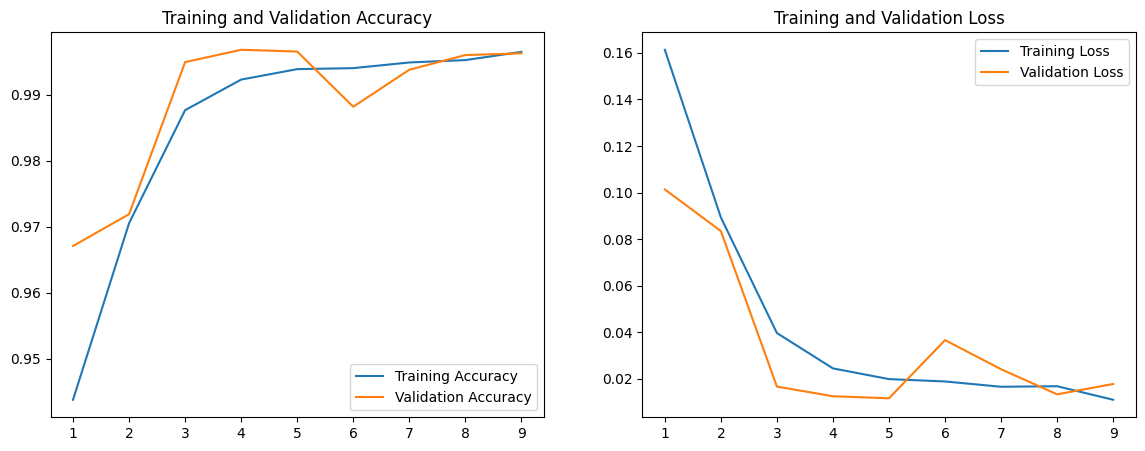

In [17]:
import matplotlib.pyplot as plt

# Ambil data history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plot akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Plot ini menampilkan grafik Training dan Validation Accuracy serta Training dan Validation Loss seiring berjalannya Epoch. Grafik Akurasi menunjukkan seberapa baik model mengklasifikasikan gambar selama pelatihan dan pada data yang belum dilihat. Grafik Loss menunjukkan seberapa baik model meminimalkan kesalahan prediksi selama pelatihan dan pada data validasi. Plot ini membantu menilai kinerja model dan mendeteksi overfitting.

In [18]:
test_loss, test_acc = model.evaluate(test_generator) # Use test_generator instead of test_ds
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9952 - loss: 0.0129

Test Accuracy: 0.9957
Test Loss: 0.0134


Output ini adalah hasil evaluasi akhir model menggunakan data uji (test set) yang sepenuhnya belum pernah dilihat oleh model selama pelatihan atau validasi.

- **352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step**: Menunjukkan bahwa model telah memproses semua 352 batch dari data uji. Angka ini berasal dari total jumlah gambar uji dibagi dengan ukuran batch (11255 gambar test / 32 batch size ≈ 352 batch). Waktu yang dibutuhkan untuk evaluasi adalah 12 detik, dengan rata-rata 34 milidetik per step.
- **accuracy: 0.9952 - loss: 0.0129**: Ini adalah akurasi dan loss model selama proses evaluasi data uji, dihitung per batch dan ditampilkan sebagai rata-rata.
- **Test Accuracy: 0.9957**: Ini adalah akurasi keseluruhan model pada seluruh set data uji. Nilai 0.9957 (atau 99.57%) menunjukkan bahwa model mampu mengklasifikasikan 99.57% gambar dalam data uji dengan benar. Ini adalah metrik utama untuk mengukur kinerja akhir model pada data yang independen.
- **Test Loss: 0.0134**: Ini adalah nilai loss keseluruhan model pada seluruh set data uji. Nilai loss yang rendah (0.0134) menunjukkan bahwa prediksi model pada data uji sangat dekat dengan nilai yang sebenarnya.

Secara keseluruhan, output ini mengkonfirmasi bahwa model memiliki kinerja yang sangat baik pada data yang benar-benar baru, dengan akurasi yang tinggi dan loss yang rendah, menunjukkan bahwa model telah belajar dengan baik dan mampu menggeneralisasi.

## Konversi Model
Bagian ini mengonversi model yang telah dilatih ke berbagai format (SavedModel, TFLite, TFJS) agar dapat digunakan di platform yang berbeda (desktop, seluler, web).

---



In [19]:
import os
import tensorflow as tf

# Buat folder utama untuk semua model
model_dir = "model_rice_classification"
os.makedirs(model_dir, exist_ok=True)

### Konversi ke SavedModel

In [20]:
saved_model_dir = os.path.join(model_dir, "saved_model")
model.export(saved_model_dir)

Saved artifact at 'model_rice_classification/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  132812920612496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132812920613456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132812920616336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132812920614608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132812920615760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132812920617104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132812920613072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132812920617488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132812920617872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132812920618832: TensorSpec(shape=(), dtype=tf.resource, name=N

### Konversi ke TFLite

In [21]:
tflite_dir = os.path.join(model_dir, "tflite")
os.makedirs(tflite_dir, exist_ok=True)

tflite_path = os.path.join(tflite_dir, "model.tflite")
labels_path = os.path.join(tflite_dir, "labels.txt")

# Konversi dari SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# Simpan model + label
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)

with open(labels_path, 'w') as f:
    f.write("\n".join(class_names))  # class_names dari training

### Konversi ke TFJS

In [22]:
tfjs_dir = os.path.join(model_dir, "tfjs")
os.makedirs(tfjs_dir, exist_ok=True)

# Install library dan konversi
!pip install tensorflowjs
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    {saved_model_dir} \
    {tfjs_dir}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.33.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
2025-05-28 04:16:36.343807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748405796.363630    4854 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attem

### Download Model

In [23]:
import shutil
from google.colab import files

# Sesuaikan nama file zip dan direktori yang akan dikompres
archive_name = "model_rice_classification"
directory_to_archive = "model_rice_classification"

# Buat file zip
shutil.make_archive(archive_name, 'zip', directory_to_archive)
print(f"Direktori '{directory_to_archive}' berhasil dikompres ke '{archive_name}.zip'")

# Unduh file zip
files.download(f"{archive_name}.zip")

Direktori 'model_rice_classification' berhasil dikompres ke 'model_rice_classification.zip'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)
Bagian ini menunjukkan cara menggunakan model yang telah dikonversi (dalam hal ini TFLite) untuk melakukan prediksi pada gambar baru dan menampilkan hasilnya.

---



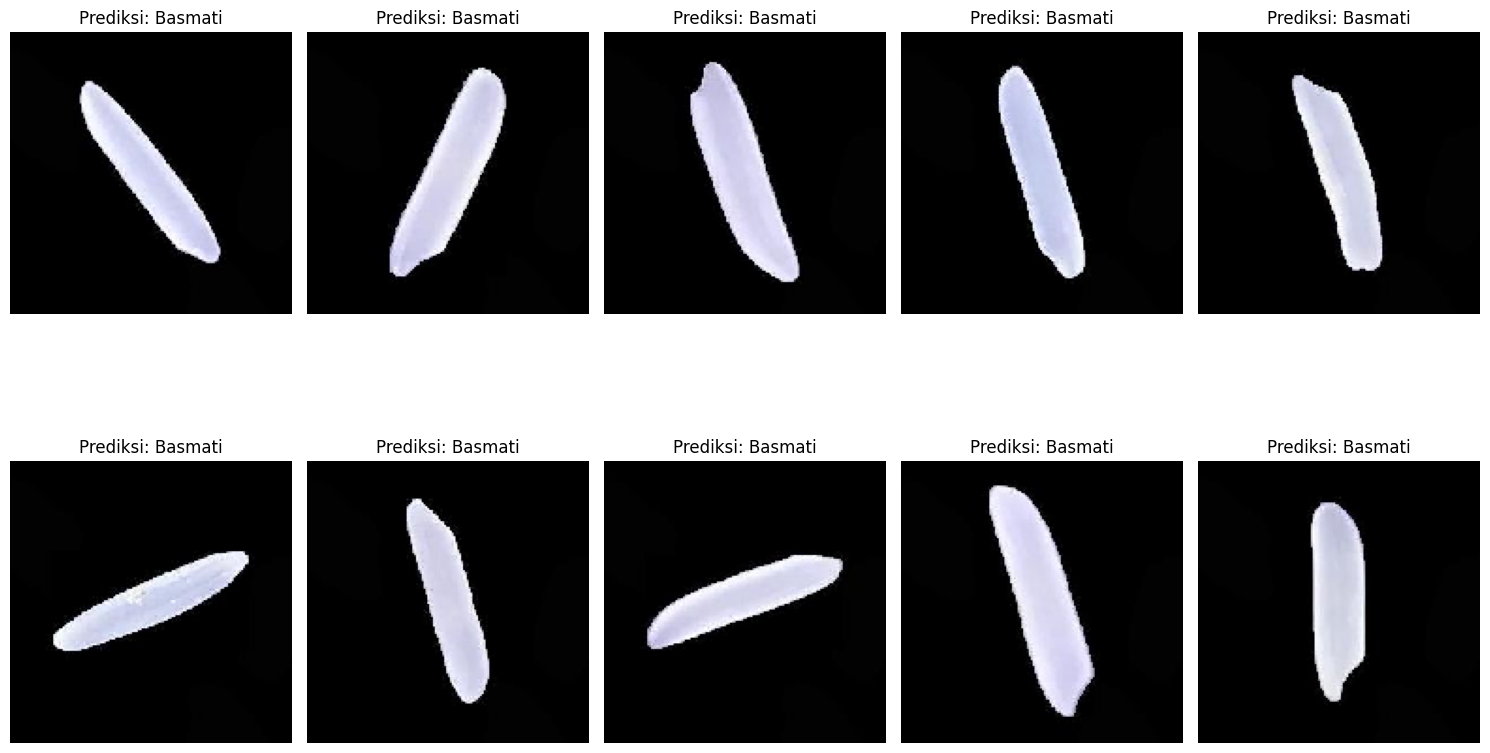

In [25]:
# Muat model TF-Lite
interpreter = tf.lite.Interpreter(model_path=tflite_path)
interpreter.allocate_tensors()

# Dapatkan detail input dan output dari interpreter
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Ambil beberapa sampel gambar dari set pengujian untuk inferensi
num_samples_to_infer = 10  # Jumlah gambar yang ingin diuji
sample_images, sample_labels = next(test_generator)
sample_images = sample_images[:num_samples_to_infer] # Ambil hanya sejumlah sampel yang diinginkan

# Lakukan prediksi menggunakan model TF-Lite untuk setiap gambar sampel
predictions = []
class_names = list(train_generator.class_indices.keys()) # Ambil nama kelas dari generator

for i in range(num_samples_to_infer):
    # Siapkan gambar input
    # Model TF-Lite juga mengharapkan batch, jadi tambahkan dimensi batch
    input_image = np.expand_dims(sample_images[i], axis=0)

    # Set tensor input interpreter
    interpreter.set_tensor(input_details[0]['index'], input_image)

    # Jalankan inferensi
    interpreter.invoke()

    # Dapatkan hasil output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Dapatkan indeks kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(output_data[0])

    # Simpan nama kelas yang diprediksi
    predictions.append(class_names[predicted_class_index])

# Tampilkan gambar sampel beserta hasil prediksinya
plt.figure(figsize=(15, 10))
for i in range(num_samples_to_infer):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i]) # Gambar sudah dinormalisasi
    plt.title(f"Prediksi: {predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [26]:
!pip freeze > requirements.txt
print("requirements.txt generated!")

requirements.txt generated!
